In [8]:
import ffn
import warnings
warnings.filterwarnings(action='ignore')

## Step 1. 데이터 가져오기

In [3]:
prices = ffn.get(['SPY','^KS11','IEF','148070.KS'], start='2012-02-28', end='2022-02-25')
prices

,spy,ks11,ief,148070ks
Date,,,,
2012-02-28,113.231621,2003.689941,88.438469,101140.0
2012-02-29,112.787117,2030.250000,88.086563,101085.0
2012-03-02,113.025841,2034.630005,88.153725,100890.0
2012-03-05,112.564873,2016.060059,87.977440,100680.0
2012-03-06,110.918617,2000.359985,88.346733,100640.0
...,...,...,...,...
2022-02-18,432.885193,2744.520020,110.721344,115410.0
2022-02-22,428.239624,2706.790039,110.711388,115410.0
2022-02-23,420.643219,2719.530029,110.133987,115410.0


In [5]:
prices.columns = ['us_stock','kr_stock','us_bond','kr_bond']

## Step 2. 기준일 베이스 스케일링

In [6]:
prices.rebase()

,us_stock,kr_stock,us_bond,kr_bond
Date,,,,
2012-02-28,100.000000,100.000000,100.000000,100.000000
2012-02-29,99.607438,101.325557,99.602090,99.945620
2012-03-02,99.818266,101.544154,99.678031,99.752818
2012-03-05,99.411164,100.617367,99.478701,99.545185
2012-03-06,97.957281,99.833809,99.896272,99.505636
...,...,...,...,...
2022-02-18,382.300624,136.973289,125.195908,114.109156
2022-02-22,378.197911,135.090264,125.184650,114.109156
2022-02-23,371.489179,135.726091,124.531766,114.109156


Populating the interactive namespace from numpy and matplotlib


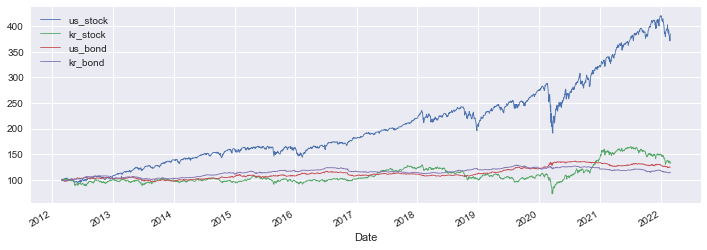

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use(['seaborn'])
%pylab inline 

prices.rebase().plot(figsize=(12,4), linewidth=0.85)
plt.show()

## Step 3. 수익률 확인

In [11]:
prices.to_returns()

,us_stock,kr_stock,us_bond,kr_bond
Date,,,,
2012-02-28,NaN,NaN,NaN,NaN
2012-02-29,-0.003925,0.013256,0.024883,-0.000544
2012-03-02,0.002116,0.002157,0.004552,-0.001929
2012-03-05,-0.004078,-0.009127,0.009567,-0.002081
2012-03-06,-0.014625,-0.007788,-0.030424,-0.000397
...,...,...,...,...
2022-02-18,-0.006475,0.000157,-0.020284,-0.000649
2022-02-22,-0.010732,-0.013747,0.008282,0.000000
2022-02-23,-0.017739,0.004707,0.014887,0.000000


> pct_change()와 동일함

In [12]:
prices.pct_change()

,us_stock,kr_stock,us_bond,kr_bond
Date,,,,
2012-02-28,NaN,NaN,NaN,NaN
2012-02-29,-0.003925,0.013256,0.024883,-0.000544
2012-03-02,0.002116,0.002157,0.004552,-0.001929
2012-03-05,-0.004078,-0.009127,0.009567,-0.002081
2012-03-06,-0.014625,-0.007788,-0.030424,-0.000397
...,...,...,...,...
2022-02-18,-0.006475,0.000157,-0.020284,-0.000649
2022-02-22,-0.010732,-0.013747,0.008282,0.000000
2022-02-23,-0.017739,0.004707,0.014887,0.000000


## Step 4. 기술통계

In [10]:
stats = prices.calc_stats()
stats.display()

Stat                 us_stock    kr_stock    us_bond     kr_bond
-------------------  ----------  ----------  ----------  ----------
Start                2012-02-28  2012-02-28  2012-02-28  2012-02-28
End                  2022-02-25  2022-02-25  2022-02-25  2022-02-25
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         285.40%     33.59%      24.79%      14.55%
Daily Sharpe         0.94        0.27        0.44        0.31
Daily Sortino        1.44        0.44        0.73        0.45
CAGR                 14.45%      2.94%       2.24%       1.37%
Max Drawdown         -33.72%     -43.90%     -9.48%      -11.91%
Calmar Ratio         0.43        0.07        0.24        0.11

MTD                  -0.95%      0.50%       -1.42%      -0.55%
3m                   -6.42%      -10.60%     -2.41%      -1.81%
6m                   -1.83%      -14.94%     -4.62%      -4.99%
YTD                  -8.07%      -10.10%     -3.62%      -3.05%
1Y                   16.02%     

In [14]:
prices.rebase()

,us_stock,kr_stock,us_bond,kr_bond
Date,,,,
2012-02-28,100.000000,100.000000,100.000000,100.000000
2012-02-29,99.607438,101.325557,99.602090,99.945620
2012-03-02,99.818266,101.544154,99.678031,99.752818
2012-03-05,99.411164,100.617367,99.478701,99.545185
2012-03-06,97.957281,99.833809,99.896272,99.505636
...,...,...,...,...
2022-02-18,382.300624,136.973289,125.195908,114.109156
2022-02-22,378.197911,135.090264,125.184650,114.109156
2022-02-23,371.489179,135.726091,124.531766,114.109156


In [12]:
prices.to_drawdown_series()

,us_stock,kr_stock,us_bond,kr_bond
Date,,,,
2012-02-28,0.000000,0.000000,0.000000,0.000000
2012-02-29,-0.003926,0.000000,-0.003979,-0.000544
2012-03-02,-0.001817,0.000000,-0.003220,-0.002472
2012-03-05,-0.005888,-0.009127,-0.005213,-0.004548
2012-03-06,-0.020427,-0.016843,-0.001037,-0.004944
...,...,...,...,...
2022-02-18,-0.090713,-0.169638,-0.084810,-0.115531
2022-02-22,-0.100471,-0.181054,-0.084892,-0.115531
2022-02-23,-0.116428,-0.177199,-0.089665,-0.115531


> 낙폭 그리기

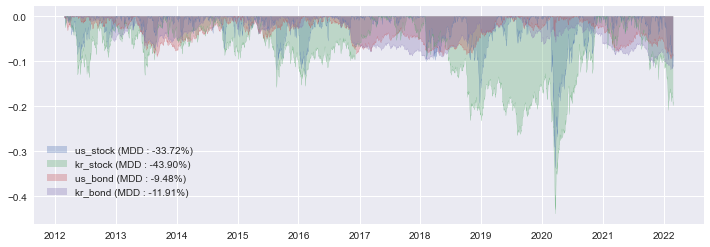

In [72]:
data=prices.to_drawdown_series()

plt.figure(figsize=(12,4))
for col in data.columns:
    plt.plot(data[col], linewidth=.15)
    plt.fill_between(x=data.index, y1=data[col], alpha=0.3, label=f'{col} (MDD : {data[col].min()*100:.2f}%)')

plt.legend(bbox_to_anchor=(0.25,0.4))
plt.show()

## Step 5. 기술통계 객체 다루기

In [78]:
stats

{'us_stock': <ffn.core.PerformanceStats at 0x7fdc28801950>,
 'kr_stock': <ffn.core.PerformanceStats at 0x7fdc29dc3490>,
 'us_bond': <ffn.core.PerformanceStats at 0x7fdc29dbc950>,
 'kr_bond': <ffn.core.PerformanceStats at 0x7fdc287edf50>}

In [53]:
# 월간 수익률
stats['us_bond'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2012   0     -0.4   -1.59   2.51   2.87  -0.41   1.4   -0.12  -0.35  -0.4    0.98  -0.42   4.06
  2013  -1.81   1.13   0.29   1.53  -3.1   -2.55  -0.35  -1.42   1.85   0.78  -0.88  -1.65  -6.16
  2014   2.3    0.65  -0.56   0.76   1.83  -0.22  -0.22   1.88  -1.05   1.54   1.29   0.02   8.45
  2015   4.42  -2.47   0.86  -0.63  -0.42  -1.63   1.52   0.08   1.58  -0.64  -0.43  -0.57   1.51
  2016   3.45   1.49  -0.07  -0.16  -0.1    3.09   0.25  -1.01   0.24  -1.49  -4.23  -0.41   0.82
  2017   0.52   0.72   0.08   1.11   0.83  -0.51   0.37   1.46  -1.44  -0.19  -0.28   0.02   2.69
  2018  -1.99  -0.93   1.16  -1.28   0.99   0.2   -0.53   1.01  -1.21  -0.3    1.33   2.42   0.77
  2019   1.03  -0.53   2.66  -0.52   3.05   1.22   0.04   3.95  -1.19   0.19  -0.69  -0.57   8.83
  2020   3.09   2.96

In [56]:
stats['us_bond'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2012   0     -0.4   -1.59   2.51   2.87  -0.41   1.4   -0.12  -0.35  -0.4    0.98  -0.42   4.06
  2013  -1.81   1.13   0.29   1.53  -3.1   -2.55  -0.35  -1.42   1.85   0.78  -0.88  -1.65  -6.16
  2014   2.3    0.65  -0.56   0.76   1.83  -0.22  -0.22   1.88  -1.05   1.54   1.29   0.02   8.45
  2015   4.42  -2.47   0.86  -0.63  -0.42  -1.63   1.52   0.08   1.58  -0.64  -0.43  -0.57   1.51
  2016   3.45   1.49  -0.07  -0.16  -0.1    3.09   0.25  -1.01   0.24  -1.49  -4.23  -0.41   0.82
  2017   0.52   0.72   0.08   1.11   0.83  -0.51   0.37   1.46  -1.44  -0.19  -0.28   0.02   2.69
  2018  -1.99  -0.93   1.16  -1.28   0.99   0.2   -0.53   1.01  -1.21  -0.3    1.33   2.42   0.77
  2019   1.03  -0.53   2.66  -0.52   3.05   1.22   0.04   3.95  -1.19   0.19  -0.69  -0.57   8.83
  2020   3.09   2.96

In [77]:
stats.display_lookback_returns()

,us_stock,kr_stock,us_bond,kr_bond
mtd,-0.95%,0.50%,-1.42%,-0.55%
3m,-6.42%,-10.60%,-2.41%,-1.81%
6m,-1.83%,-14.94%,-4.62%,-4.99%
ytd,-8.07%,-10.10%,-3.62%,-3.05%
1y,16.02%,-13.64%,-2.54%,-4.67%
3y,18.10%,6.23%,3.34%,-1.48%
5y,15.09%,5.12%,2.60%,-0.20%
10y,14.45%,2.94%,2.24%,1.37%
incep,14.45%,2.94%,2.24%,1.37%


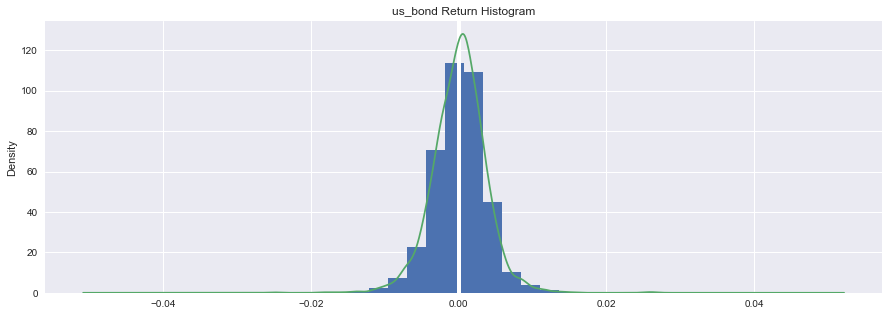

In [79]:
stats['us_bond'].plot_histogram();